# MODULE 1: MAKING SENSE OF UNSTRUCTURED DATA

## CASE STUDY 1.1 - COMPUTING EIGENFACES
**Faculty Name: Stefanie Jegelka**

In this document, we walk through some helpful tips to get you started with building your own 
application for classifying faces in photo images using Principle Component Analysis (PCA)

## Importing libraries

In [1]:
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import copy
import utils

## Image Dataset

**Image Dataset**

You are encouraged to try this example using your own collection of images. You should save each
image separately and they should all have the following characteristics:

1. The face should cover a large section of the image area.
2. As much as possible, the person in the image should be looking directly at the camera.

For reference, we provide the images of the instructors of this course. These images are all in jpg
format and titled as “1.jpg”, “2.jpg”, …. “14.jpg”. Ensure that they are placed in a directory called
“instructors”. 

Given that the raw images are not all the same dimensions and in RGB format, we will need to pre-process them to all be of the same dimensions and in Grayscale color. 

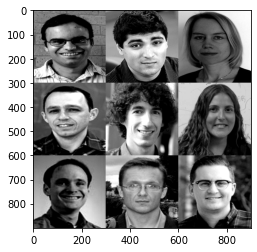

In [2]:
# number of images on the training set.
M = 14;
# read and show images(jpg);

# S will store all the images
S=[];

#Ensure the instructors folder is in the same directory and has not been moved.
S, all_faces = utils.loadFaces('instructors/')
grid_im = utils.gray_images_square_grid(np.array(all_faces))
plt.imshow(grid_im, cmap='gray')

Images of the instructors are loads in grayscale. 

## Steps in PCA
#### 1:Standardize the data.
The PCA works on maximizing the variance.It projects the original data into directions which maximize the variance. So we should standardized the variables before applying PCA because it will give more importance to those variables having higher variances than to those variables with very low variances while identifying the right principle component. If you Standardize the data, all variables have the same standard deviation, thus all variables have the same weight and your PCA calculates relevant axis.
#### 2:Calculate the Covariance Matrix
Variance and Covariance are a measure of the spread of data around their mean. For PCA We need to study the relationships between the variables involved in a dataset, to be able to create new variables that can reduce the number of original values, without compromising on the information contained in them. The new variables are formed on the basis of correlations between the original variables.A covariance matrix expresses the relationship between the different variables in the dataset.Covariance is measured between 2 dimensions to see if there is a relationship between the 2 dimensions for example discount & Number of sales. The covariance with itself is the variance.
####  3:Compute Eigenvalues and EigenVectors of the covariance matrix.
The covariance matrix which we have calculated is then decomposed into eigenvalues and eigenvectors. Eigenvectors are those vectors when a linear transformation is performed on them, their direction does not change. They don’t change their direction they just scale the vector upwards or downwards. The value at which it scales is called the eigenvalue usually denoted by lambda.
#### 4:Selecting Number of components using Explained Variance
The desired goal is to reduce the dimensions of a d-dimensional dataset by projecting it onto a (k)-dimensional subspace in order to increase the computational efficiency while retaining most of the information. So the important question is what is the size of k that represents the data well?
We have got the eigenvalues and eigenvectors.Here we are going to find the number of components(k) which can explain maximum amount of variance.
#### 5:Projecting the data into lower dimensions.
The last step is to re-arrange the original data with the final low dimensional space (principal components) which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.

## Computing	Eigenfaces

In order to compute all Eigenfaces, we need to perform several processing steps. 

1. We first need to normalize the each image. Note that the normalized, square, gray images are saved in the same location as the script and will be reused several times. 

2. Compute a Mean (Average) face from all the normalized faces. 

3. Now, we can compute the Eigenfaces (Eigenvectors).

The below function `computeEigenFaces(S)`, takes all images(S) as input.These are the normalized images.Earlier all the images(S) were storing in the list. We are converting them into the array and storing in the variable dbx.

Now in PCA after normalization the next step is to calculate the covariance matrix which is the matrix multiplied by its transpose.

To calculate the covariance matrix we are using **np.matmul** function takes product of two matrices A and A transpose.

After calculating the covariance matrix next step is calculate the eigenvalues and eigenvectors which can be done using the **np.linalg.eig**. This method returns both eigenvalues and eigenvectors by taking covariance matrix as input.

Next, we don't need all the eigenvectors. We can select few eigenvectors which can explain max amount of variance. We select based on the threshold 1e-4(you may change according to the requirement),will consider the ones which takes eigenvalues greater than the threshold.Now we we have finalized number of eigenvalues and eigenvectors to considered.

Next step is to reduce the number of dimensions.To reduce we need to take product of two vectors which are the original features(dbx) and eigenvectors(v) and storing in the list. Last block of code is to normalize the reduced dimensions.

#### The following code computes all the necessary components needed to compute the Eigenfaces and then finally saves (under the directory: “eigenfaces”) and shows the Eigenfaces:

In [3]:
def computeEigenFaces(S):
    dbx = np.array(S) #Converting into numpy array
    A = dbx # Note that the dbx here is transposed as compared to the original M script
    
    # Covariance matrix C=A'A, L=AA'
    covariance_matrix = np.matmul(A, A.T)
    
    A=None
    
    #Compute the eigenvalues and eigenvectors from the covariance matrix
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)     
    
    
    # Sort and eliminate those whose eigenvalue is small based on the threshold.
    nonzero_eigenvals = eigen_values > 1e-4
    v = eigen_vectors[:,nonzero_eigenvals]
    d = eigen_values[nonzero_eigenvals]
    
    # Sort eigenvalues already sorted, but in descending order, so let's change this into ascending
    d = d[::-1]
    v = v[:,::-1] 
    
    
    # Reducing the number of dimensions by multiplying original vales and eigenvectors.
    u = []
    for i in range(len(d)):
        temp = np.sqrt(d[i])
        u.append(np.matmul(dbx.T, v[:,i])/temp) 
    
    # Normalization of reduced dimensions.
    for i in range(len(u)):
        kk = u[i]
        temp = np.sqrt(np.sum(np.square(kk)))
        u[i] = u[i]/temp
    
    return u

## Processing and Visualization

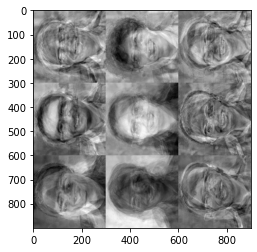

In [4]:
# Normalize the images
S = utils.normalizeImages(S)

# Compute average face
avg_face = utils.computeAverageFace(S)

# Calling the above function which results the eigenfaces
EigenFaces = computeEigenFaces(S)

# Now render the eigenfaces
EigenFacesIm = []

#Visualizaing the eigenfaces
for i in range(len(EigenFaces)):
    img = np.reshape(EigenFaces[i], (300,300))
    img = img.T
    # Scale the image
    img = utils.convertImageToU8bit(img)
    # convert and save
    im = Image.fromarray(img)
    im.convert('RGB').save('eigenfaces/eigen_{}.jpeg'.format(i+1))

    EigenFacesIm.append(img)

_, eigen_faces = utils.loadFaces('.\\eigenfaces\\')
grid_im = utils.gray_images_square_grid(np.array(eigen_faces))
plt.imshow(grid_im, cmap='gray')

## Reconstruct Image from EigenFaces

Given an unknown face new_image.jpg, we need to first preprocess the face and make it normalized. We can reconstruct a face by using these eigenfaces. Each face is just a weighted combination of the eigenfaces. We obtain the weights by multiplying the normalized image with the eigenfaces.

Finally, To reconstruct a face, we multiply the weights with the eigenfaces, and add the mean face.

**Please save a new_image.jpg you want to check for.**

In [5]:
def reconstructNewFaces(u, mean_face, input_image = 'new_image.jpg'):

    eigen_face = np.array(u)
    
    # Read the input image and convert to gray scale     
    im = Image.open(input_image)
    InputImage = im.convert('L')
    
    # Converting to numpy array
    im_raw = np.asarray(InputImage)
    
    # Reshaping to vector
    InImage = np.reshape(im_raw.T,im_raw.shape[0]*im_raw.shape[1])
    
    # Normalization of the vector
    temp = InImage
    me=np.mean(temp)
    st=np.std(temp)
    temp=(temp-me)*st/(st+me)
    NormImage = temp
    
    # obtain the weights by dotting the normalized image with the eigenfaces
    weights = np.matmul(u, NormImage.T)

    # To reconstruct a face, we dot the weights with the eigenfaces, and add the mean face.
    ReshapedImage = mean_face + np.matmul(weights, u)
    
    # Converting back to image
    ReshapedImage = np.reshape(ReshapedImage,im_raw.shape)
    ReshapedImage = ReshapedImage.T
    
    return ReshapedImage

## Show Reconstructed Image

In [6]:
ReshapedImage = reconstructNewFaces(EigenFaces, avg_face, 'new_image.jpg')

# Show the reconstructed image.
ReshapedImage_s = utils.convertImageToU8bit(ReshapedImage)
ReshapedImage_s = Image.fromarray(ReshapedImage_s)
ReshapedImage_s.show()

We have created EigenFaces from the dataset of images of different faculty for this program. The resulting image is not that clear but is able to capture patters in the images.